In [43]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [45]:
# Aplikasi Pengambil Keputusan untuk diimplementasikan pada mesin pengaliran air di sawah menggunakan kecerdasan buatan metode fuzzy

#Membuat rentang semesta untuk input dan output
x_tanah = np.arange(0, 100, 1) #semesta untuk input presentase tanah kering
x_tanaman = np.arange(0, 100, 1)  #semesta untuk input total tanaman
x_air = np.arange(0, 100, 1) #semesta untuk output volume air mengalir

In [46]:
#Membuat fungsi keanggotaan tanah
tanah_kering = fuzz.trimf(x_tanah, [0, 0, 29])
tanah_normal = fuzz.trimf(x_tanah, [30, 50, 70])
tanah_basah = fuzz.trimf(x_tanah, [71, 100, 100])

In [47]:
#Membuat fungsi keanggotaan tanaman
tanaman_sedikit = fuzz.trimf(x_tanaman, [0, 0, 29])
tanaman_sedang = fuzz.trimf(x_tanaman, [30, 50, 70])
tanaman_banyak = fuzz.trimf(x_tanaman, [71, 100, 100])

In [48]:
#Membuat fungsi keanggotaan output
air_sedikit = fuzz.trimf(x_air, [0, 0, 29])
air_sedang = fuzz.trimf(x_air, [30, 50, 70])
air_banyak = fuzz.trimf(x_air, [70, 100, 100])

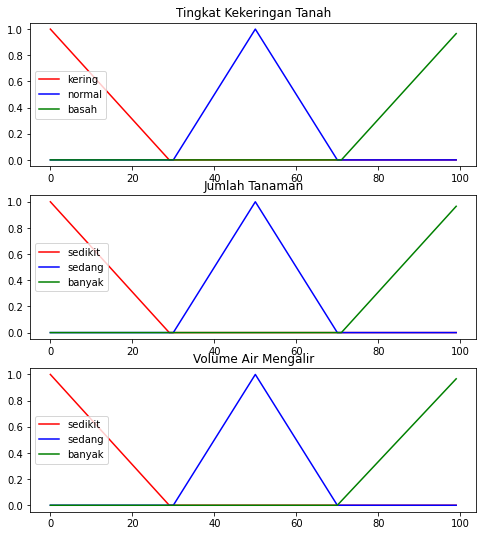

In [49]:
#Visualisasi semesta dan fungsi keanggotaan
fig, (ax0,ax1,ax2) = plt.subplots(nrows=3, figsize=(8, 9))
ax0.plot(x_tanah, tanah_kering, 'r', linewidth=1.5, label='kering')
ax0.plot(x_tanah, tanah_normal, 'b', linewidth=1.5, label='normal')
ax0.plot(x_tanah, tanah_basah, 'g', linewidth=1.5, label='basah')
ax0.set_title('Tingkat Kekeringan Tanah')
ax0.legend()
ax1.plot(x_tanaman, tanaman_sedikit, 'r', linewidth=1.5, label='sedikit')
ax1.plot(x_tanaman, tanaman_sedang, 'b', linewidth=1.5, label='sedang')
ax1.plot(x_tanaman, tanaman_banyak, 'g', linewidth=1.5, label='banyak')
ax1.set_title('Jumlah Tanaman')
ax1.legend()
ax2.plot(x_air, air_sedikit, 'r', linewidth=1.5, label='sedikit')
ax2.plot(x_air, air_sedang, 'b', linewidth=1.5, label='sedang')
ax2.plot(x_air, air_banyak, 'g', linewidth=1.5, label='banyak')
ax2.set_title('Volume Air Mengalir')
ax2.legend()

In [50]:
#Mengatur tampilan
# turn off top/right axes
for ax in (ax0, ax1, ax2):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [51]:
9# FUZZIFIKASI INPUT
# FUZZIFIKASI TANAH
inputan_tanah = int(input("Tingkat Persentase Kekeringan Tanah (%): "))

tanah_level_kering = fuzz.interp_membership(x_tanah, tanah_kering, inputan_tanah)
tanah_level_normal = fuzz.interp_membership(x_tanah, tanah_normal, inputan_tanah)
tanah_level_basah = fuzz.interp_membership(x_tanah, tanah_basah, inputan_tanah)

print(tanah_level_kering)
print(tanah_level_normal)
print(tanah_level_basah)

Tingkat Persentase Kekeringan Tanah (%): 10
0.6551724137931034
0.0
0.0


In [52]:
#FUZZIFIKASI TANAMAN
inputan_tanaman = int(input("Jumlah Tanaman (unit): "))
tanaman_level_sedikit = fuzz.interp_membership(x_tanaman, tanaman_sedikit, inputan_tanaman)
tanaman_level_sedang = fuzz.interp_membership(x_tanaman, tanaman_sedang, inputan_tanaman)
tanaman_level_banyak = fuzz.interp_membership(x_tanaman, tanaman_banyak, inputan_tanaman)

print(tanaman_level_sedikit)
print(tanaman_level_sedang)
print(tanaman_level_banyak)

Jumlah Tanaman (unit): 90
0.0
0.0
0.6551724137931034


In [53]:
active_rule1 = np.fmin(tanah_level_kering, tanaman_level_sedikit)
active_rule2 = np.fmin(tanah_level_kering, tanaman_level_sedang)
active_rule3 = np.fmin(tanah_level_kering, tanaman_level_banyak)

active_rule4 = np.fmin(tanah_level_normal, tanaman_level_sedikit)
active_rule5 = np.fmin(tanah_level_normal, tanaman_level_sedang)
active_rule6 = np.fmin(tanah_level_normal, tanaman_level_banyak)

active_rule7 = np.fmin(tanah_level_basah, tanaman_level_sedikit)
active_rule8 = np.fmin(tanah_level_basah, tanaman_level_sedang)
active_rule9 = np.fmin(tanah_level_basah, tanaman_level_banyak)

In [54]:
air_activation1 = np.fmin(active_rule1, air_sedikit)
air_activation2 = np.fmin(active_rule2, air_sedang)
air_activation3 = np.fmin(active_rule3, air_banyak)

air_activation4 = np.fmin(active_rule4, air_sedikit)
air_activation5 = np.fmin(active_rule5, air_sedang)
air_activation6 = np.fmin(active_rule6, air_banyak)

air_activation7 = np.fmin(active_rule7, air_sedikit)
air_activation8 = np.fmin(active_rule8, air_sedang)
air_activation9 = np.fmin(active_rule9, air_banyak)
air0 = np.zeros_like(x_air)



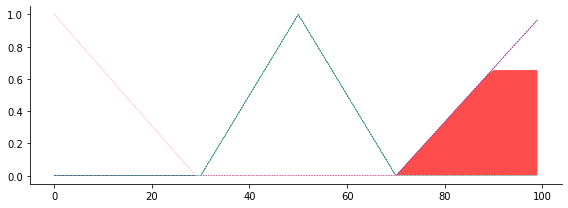

In [55]:
fig, ax0 = plt.subplots(figsize=(8,3))
ax0.fill_between(x_air, air0, air_activation1, facecolor='b', alpha=0.7)
ax0.plot(x_air, air_banyak, 'b', linewidth=0.5, linestyle='--')
ax0.fill_between(x_air, air0, air_activation2, facecolor='g', alpha=0.7)
ax0.plot(x_air, air_sedang, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_air, air0, air_activation3, facecolor='r', alpha=0.7)
ax0.plot(x_air, air_sedikit, 'r', linewidth=0.5, linestyle='--')

ax0.fill_between(x_air, air0, air_activation4, facecolor='y', alpha=0.7)
ax0.plot(x_air, air_banyak, 'y', linewidth=0.5, linestyle='--')
ax0.fill_between(x_air, air0, air_activation5, facecolor='k', alpha=0.7)
ax0.plot(x_air, air_sedang, 'k', linewidth=0.5, linestyle='--')
ax0.fill_between(x_air, air0, air_activation6, facecolor='w', alpha=0.7)
ax0.plot(x_air, air_sedikit, 'w', linewidth=0.5, linestyle='--')

ax0.fill_between(x_air, air0, air_activation7, facecolor='m', alpha=0.7)
ax0.plot(x_air, air_banyak, 'm', linewidth=0.5, linestyle='--')
ax0.fill_between(x_air, air0, air_activation8, facecolor='c', alpha=0.7)
ax0.plot(x_air, air_sedang, 'c', linewidth=0.5, linestyle='--')
ax0.fill_between(x_air, air0, air_activation9, facecolor='w', alpha=0.7)
ax0.plot(x_air, air_sedikit, 'w', linewidth=0.5, linestyle='--')

#turn off top/right axes (memperbesar visual)
for ax in (ax0,):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()
plt.tight_layout()

# mamdani intinya hasilnya kalo ada yang sama harus di fmax
out_sedikit = np.fmax(air_activation1, np.fmax(air_activation4,air_activation7))
out_sedang = np.fmax(air_activation2, np.fmax(air_activation5,air_activation8))
out_banyak = np.fmax(air_activation3, np.fmax(air_activation6,air_activation9))

In [56]:
#proses penggabungan
aggregated = np.fmax(out_sedikit, np.fmax(out_sedang,out_banyak))

88.57391304347829
0.6191304347826094


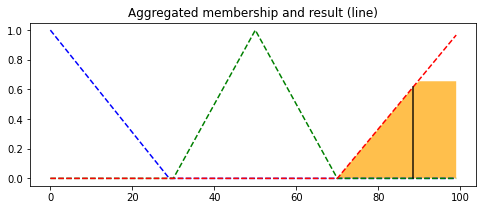

In [57]:
air = fuzz.defuzz(x_air, aggregated, 'centroid')
air_activation = fuzz.interp_membership(x_air, aggregated, air) #for plot

fig, ax0 = plt.subplots(figsize=(8,3))
ax0.plot(x_air, air_sedikit, 'b', linewidth=1.5, linestyle='--')
ax0.plot(x_air, air_sedang, 'g', linewidth=1.5, linestyle='--')
ax0.plot(x_air, air_banyak, 'r', linewidth=1.5, linestyle='--')
ax0.fill_between(x_air, air0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([air,air], [0, air_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

print(air)
print(air_activation)

In [58]:
#Membuat perkondisian
if air <=10:
  print("air mengalir dengan volume sedikit")
elif air >= 40:
  print("air mengalir dengan volume banyak")
else:
  print("air mengalir dengan volume sedang")

air mengalir dengan volume banyak
